In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.ndimage import rotate
from scipy.optimize import curve_fit

In [13]:
#Define needed functions
def twoDimensionalGaussian(centerX = 1250, centerY = 1250, width = 150, height = 20):
    x, y = np.meshgrid(np.linspace(0,2499,2500), np.linspace(0,2499,2500))
    d = np.sqrt((x - centerX)**2+(y-centerY)**2)
    sigma = width
    g = height * np.exp(-( (d)**2 / ( 2.0 * sigma**2 ) ) )
    return g

def getcontrast(maxa, mina):
    return (maxa-mina)/(maxa+mina)

def getContrastOfSpectrum(spectrum):
    axis = np.sum(np.abs(spectrum), axis=1)[1185:1315]
    #do it with std dev
    return np.std(axis)
    maxa = np.amax(axis)
    mina = np.amin(axis)
    return getcontrast(maxa, mina)

def spatialModel(x, a, b, d):
    return a*np.cos((b*x))+d

largest crystal distance: 32.0
that corresponds to a spatial freq. of: 0.03125


<IPython.core.display.Javascript object>


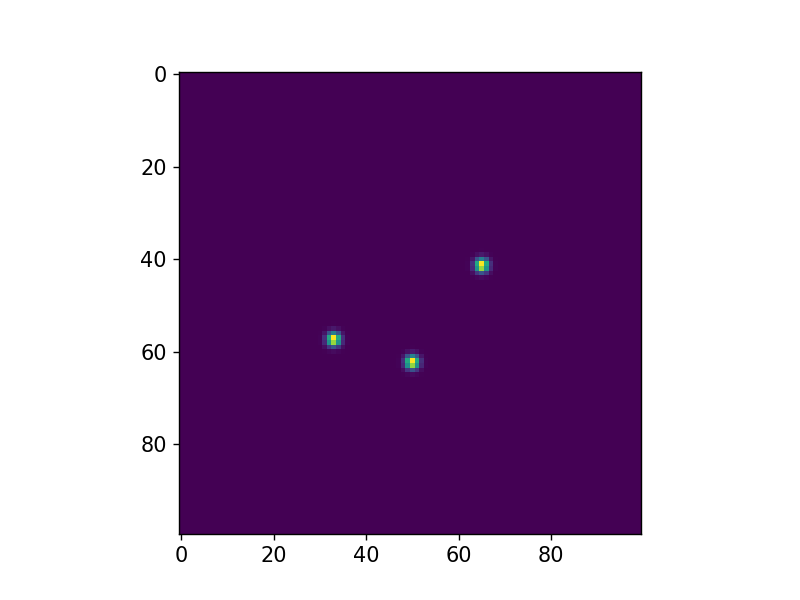

In [24]:
#Create regular triangle shaped emitters
emitters = np.zeros((2500,2500))
#create emitter positions
baselength = 30
offsetX, offsetY = 1250 - (baselength * 0.5), 1250 - (np.sqrt(3)*baselength*(1/6.))
EmitterOneX, EmitterOneY = 0 + offsetX - 2, 0 + offsetY + 16
EmitterTwoX, EmitterTwoY = baselength + offsetX, 0 + offsetY
EmitterThreeX, EmitterThreeY = (baselength*0.5) + offsetX, np.sqrt(3)*(baselength*0.5) + offsetY - 5

emitters = np.add(twoDimensionalGaussian(EmitterOneX, EmitterOneY, 1., 1.), emitters)
emitters = np.add(twoDimensionalGaussian(EmitterTwoX, EmitterTwoY, 1., 1.), emitters)
emitters = np.add(twoDimensionalGaussian(EmitterThreeX, EmitterThreeY, 1., 1.), emitters)

#display Emitters
plt.figure()
#plt.clf()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.imshow(emitters[1200:1300,1200:1300])
plt.savefig("assumedCrystal.pdf")
#plt.show()

<IPython.core.display.Javascript object>


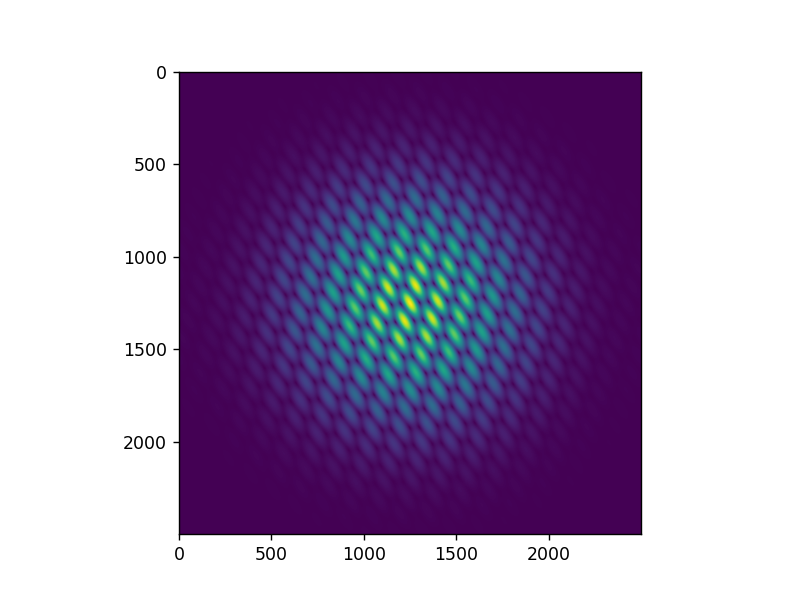

In [4]:
#do Fourier Transform
spectrum = np.fft.fftshift(np.fft.fft2(emitters))
plt.figure()
plt.imshow(np.abs(spectrum))
plt.show()

<IPython.core.display.Javascript object>


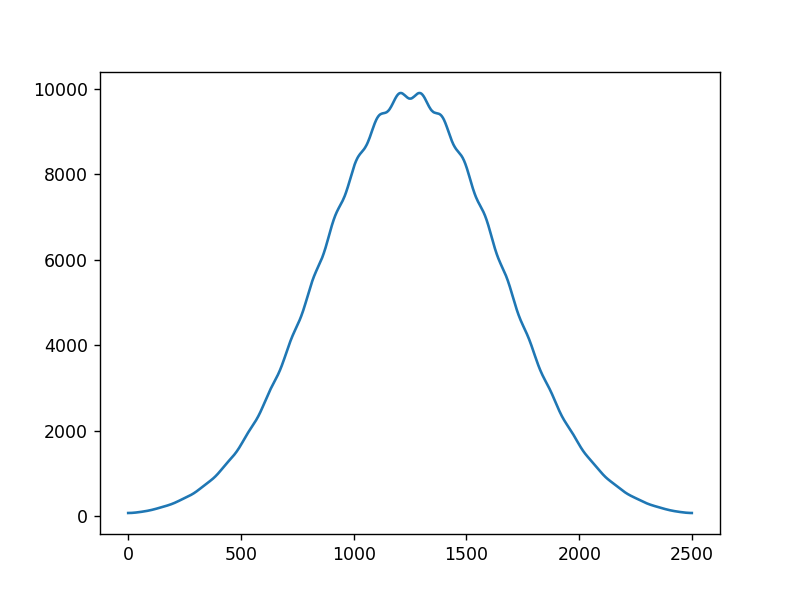

In [5]:
#project two 1D
axis = np.sum(np.abs(spectrum), axis=1)
plt.figure()
plt.plot(axis)
plt.show()

<IPython.core.display.Javascript object>


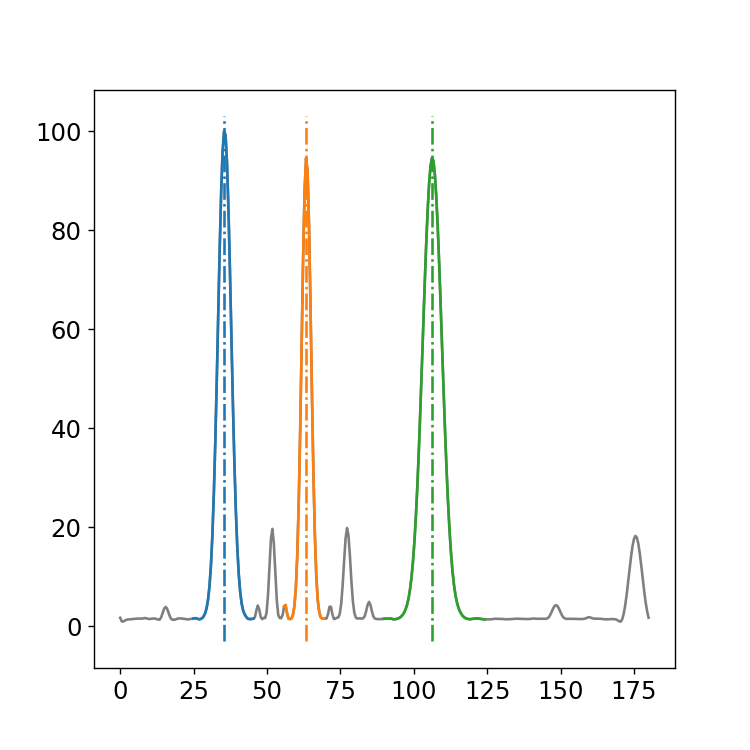

In [6]:
angles = []
contrasts = []

for i in np.linspace (0, 180, num=362):
    #print("angle: " + str(i) + " degree")
    rotatedspectrum = rotate(np.abs(spectrum), i, axes=(1,0), reshape=False)
    #plt.figure()
    #plt.imshow(rotatedspectrum)
    #plt.savefig("testo_" + str(i) + ".png", dpi=100)
    contrast = getContrastOfSpectrum(rotatedspectrum)
    #print("Contrast: " + str(contrast))
    #print("-----------")
    angles.append(i)
    contrasts.append(contrast)

scalingFactor = np.amax(contrasts)
contrasts = (contrasts / scalingFactor) * 100

plt.figure(figsize=(6, 6))
plt.plot(angles, contrasts, color="tab:grey")
plt.plot(angles[50:92], contrasts[50:92], color="tab:blue")
plt.plot(angles[112:140], contrasts[112:140], color="tab:orange")
plt.plot(angles[180:250], contrasts[180:250], color="tab:green")
plt.plot([35.5, 35.5],[-3.0, 103.0], "-.", color="tab:blue")
plt.plot([63.4, 63.4],[-3.0, 103.0], "-.", color="tab:orange")
plt.plot([106.3, 106.3],[-3.0, 103.0], "-.", color="tab:green")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.show()
plt.savefig("RotationalResolution.pdf")

spatial frequency (0): 0.06526658196771318 with error: \pm5.587282978416617e-05


<IPython.core.display.Javascript object>


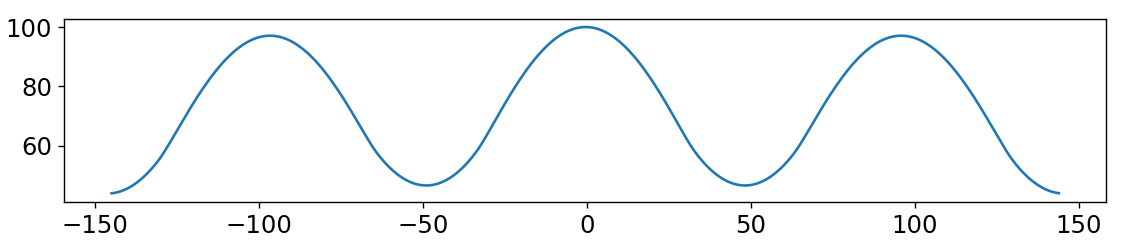

spatial frequency (1): 0.0896337385238019 with error: \pm8.716583034787372e-05


<IPython.core.display.Javascript object>


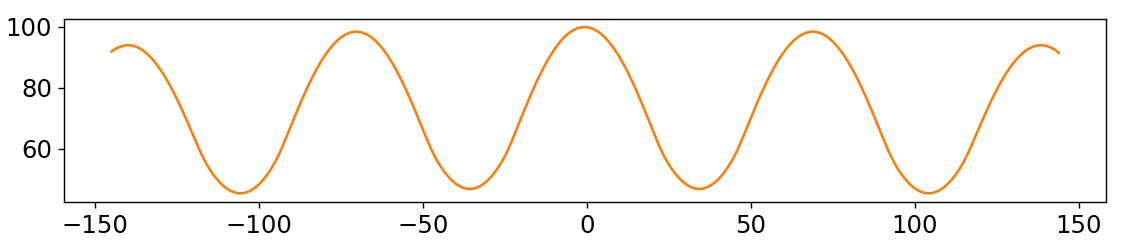

spatial frequency (2): 0.04384494885360615 with error: \pm8.579289565181847e-05


<IPython.core.display.Javascript object>


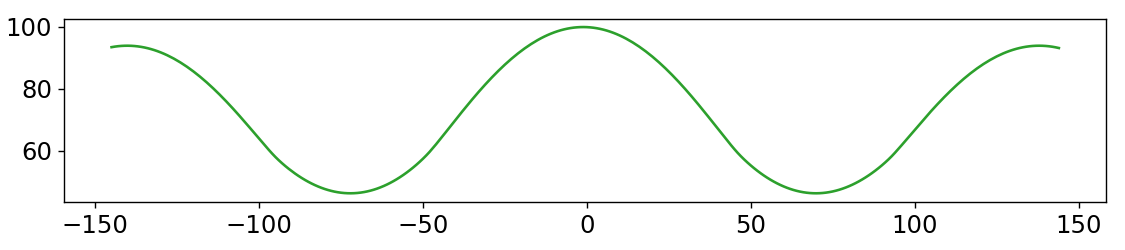

In [18]:
#show values with max contrast
values = [35.5, 63.4, 106.3]
colors = ["tab:blue", "tab:orange", "tab:green"]
frequencies = []
for element in values:
    rotatedEmitters = rotate(emitters, int(element), axes=(1,0), reshape=False)
    #display Emitters
    #plt.figure()
    #plt.imshow(rotatedEmitters[1220:1280,1220:1280])
    #plt.savefig("foundFrequency" + str(element) + ".pdf")
    #plt.show()
    #rotate and display spectrum
    rotatedspectrum = rotate(np.abs(spectrum), element, axes=(1,0), reshape=False)
    axis = np.sum(np.abs(rotatedspectrum), axis=1)[1105:1395]
    frequencies.append(axis)
    
    
scalingFactor = np.amax(frequencies)
frequencies = (frequencies/scalingFactor) * 100

pooo = [
    [25, 0.063, 70.],
    [25, 0.09, 70.],
    [25, 0.035, 70.]
]

i = 0
for element in frequencies:
    popt, pcov = curve_fit(spatialModel, range(-145, 145), element, p0=pooo[i])
    print("spatial frequency (" + str(i) + "): " + str(popt[1]) + " with error: \pm" + str(np.sqrt(pcov[1][1]))) 
    plt.figure(figsize=(9, 2))
    plt.plot(range(-145, 145),element, label=str(values[i]) + " degree", color=colors[i])
    #plt.plot(range(-145, 145), spatialModel(range(-145, 145), *popt))
    plt.tight_layout()
    #plt.legend(loc="best")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig("threeFreqs" + str(values[i]) + ".pdf")
    i += 1
